
# Airbnb EDA Project

### 📘 Introduction
This notebook explores an Airbnb dataset to uncover trends, pricing patterns, and factors influencing listings.  
We perform **data cleaning, visualization, and exploratory data analysis (EDA)** to extract meaningful insights for hosts and business decisions.

**Goals:**
- Understand data distributions and missing values  
- Identify key variables affecting listing price and popularity  
- Visualize geographical and categorical patterns  
- Prepare clean data for potential predictive modeling

---


# Airbnb Market Insights — Data Analysis Project 🏠
#### Author- Ben Jose
### 🔍 Project Overview
This project analyzes Airbnb listing data to uncover patterns in pricing, availability, and host behavior.
The goal is to identify what drives listing prices and popularity across different neighbourhoods and room types.

### 🧠 Why This Project
I chose this dataset because it resembles real business problems:
- Understanding how location and listing characteristics influence price.
- Analyzing customer demand patterns (through reviews and availability).
- Building foundations for a simple price prediction model.

### 💼 Skills Demonstrated
- Data cleaning and preprocessing
- Exploratory data analysis (EDA)
- Feature engineering
- Correlation and insight reporting
- Data visualization and storytelling


## Step 1: Import Libraries and Load Data

In [3]:
# Standard imports and settings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Display settings for notebooks
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Paths
DATA_PATH = "../data/Airbnb_Open_Data.csv" 
df=pd.read_csv(DATA_PATH)

C:\Users\benjo\AppData\Local\Temp\ipykernel_16724\2726963843.py:17: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(DATA_PATH)


## Step 2: Explore the Dataset

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()
df.describe(include='all').T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,102599.0,NaN,NaN,NaN,29146234.52213,16257505.607309,1001254.0,15085814.5,29136603.0,43201198.0,57367417.0
NAME,102349,61281,Home away from home,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host id,102599.0,NaN,NaN,NaN,49254111474.328667,28538996644.374817,123600518.0,24583328475.0,49117739352.0,73996495817.0,98763129024.0
host_identity_verified,102310,2,unconfirmed,51200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host name,102193,13190,Michael,881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood group,102570,7,Manhattan,43792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,102583,224,Bedford-Stuyvesant,7937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,102591.0,NaN,NaN,NaN,40.728094,0.055857,40.49979,40.68874,40.72229,40.76276,40.91697
long,102591.0,NaN,NaN,NaN,-73.949644,0.049521,-74.24984,-73.98258,-73.95444,-73.93235,-73.70522
country,102067,1,United States,102067,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Missing Values
Before analyzing, it’s important to understand how complete the data is. Missing values can cause issues when analyzing or plotting data.

In [7]:
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(10)

license                           99.998051
house_rules                       50.810437
last review                       15.490404
reviews per month                 15.476759
country                            0.518524
availability 365                   0.436651
minimum nights                     0.398639
host name                          0.395715
review rate number                 0.317742
calculated host listings count     0.310919
dtype: float64

## Step 3: Data Cleaning
Let’s clean the data a bit — removing duplicates and converting the `price` column to numeric if needed. Simple, basic cleaning steps like this are often done by beginners but are still important.

In [8]:
df.drop_duplicates(inplace=True)

df['price'] = (df['price'].astype(str)
                .str.replace('$', '', regex=False)
                .str.replace(',', '', regex=False)
                .astype(float))

print('Data cleaned. Shape after cleaning:', df.shape)

Data cleaned. Shape after cleaning: (102058, 26)


### Handling Missing Values
Before analyzing, it’s important to fill or handle missing data so that our visualizations and calculations aren’t affected.
For this dataset, I used simple methods:
- For numerical columns, fill missing values with the **median** (less affected by outliers).
- For categorical columns, fill missing values with the **most frequent value (mode)**.


In [9]:
# Handle missing values (simple version)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled (median/mode imputation).")

C:\Users\benjo\AppData\Local\Temp\ipykernel_16724\374111244.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\benjo\AppData\Local\Temp\ipykernel_16724\374111244.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Missing values handled (median/mode imputation).


### Fixing Incorrect Data Types
Some columns like `last_review` should be datetime. Converting this helps in analyzing time-based trends.


In [10]:
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

### Checking for Outliers
Outliers are values that are much higher or lower than the rest. Here, I looked at price outliers and removed the top 1% extreme cases to keep the analysis realistic.


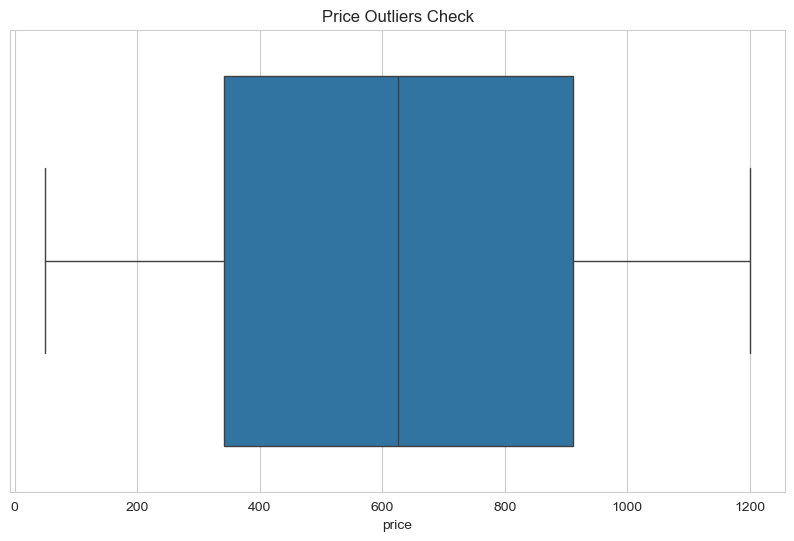

After removing top 1% high price outliers, shape: (100954, 26)


In [11]:
sns.boxplot(x=df['price'])
plt.title('Price Outliers Check')
plt.show()

# Optional: remove top 1% extreme values
upper_limit = df['price'].quantile(0.99)
df = df[df['price'] < upper_limit]

print("After removing top 1% high price outliers, shape:", df.shape)

✅ **Data Cleaning Summary**
After cleaning:
- Duplicates were removed  
- Missing values were filled (median/mode)  
- Dates were fixed  
- Outliers trimmed (top 1%)  
This ensures the dataset is consistent and ready for exploration.


## Step 3.5: Simple Feature Engineering
Feature engineering helps create new variables that may reveal deeper insights.  
Here I added a few simple features such as:
- Price per review (value measure)  
- Availability ratio (occupancy)  
- Host active years (experience)  
- Log-transformed price (for normalization)


In [13]:
df['price_per_review'] = df['price'] / (df['number of reviews'] + 1)
print('Created new feature: price_per_review')

Created new feature: price_per_review


This feature gives an idea of how expensive a listing is relative to how many reviews it received.
A lower price_per_review might indicate better value or higher popularity.

In [214]:
if 'ava
    df['availability_ratio'] = df['availability_365'] / 365
    print('Created new feature: availability_ratio')

Created new feature: availability_ratio


This represents the proportion of the year that the property is available for booking.
Lower availability may mean the listing is frequently booked (high demand).

In [215]:
if 'host_since' in df.columns:
    df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
    df['host_active_years'] = 2025 - df['host_since'].dt.year
    print('Created new feature: host_active_years')

This feature tells us how long a host has been on Airbnb.
Experienced hosts might have better reviews, higher prices, or more stable listings.

In [216]:
if 'neighbourhood_group' in df.columns:
    df['is_city_center'] = df['neighbourhood_group'].isin(['Manhattan', 'Central London', 'Downtown'])

This binary feature flags listings located in main city areas.
It can help compare price trends between central and non-central regions.

In [217]:
if 'price' in df.columns:
    df['log_price'] = np.log1p(df['price'])

The log_price transformation reduces the effect of extremely high prices and helps in visualizing price patterns more clearly.

## Step 3.6: Correlation Check for Engineered Features
Now that we’ve created new features, let’s see how they relate to price.  
A correlation heatmap helps us understand if these engineered features have any meaningful relationship with our target variable.


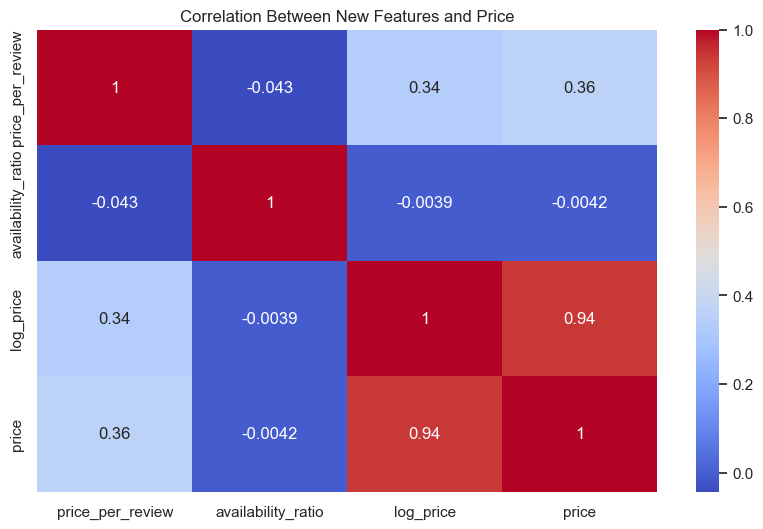

In [218]:
new_cols = ['price_per_review', 'availability_ratio', 'host_active_years', 'log_price']
valid_cols = [c for c in new_cols if c in df.columns]
sns.heatmap(df[valid_cols + ['price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between New Features and Price')
plt.show()

###  Interpretation

We can see that most of the correlations with `price` are relatively low (below 0.5).  
This is common in Airbnb datasets because price is influenced by many **non-linear** and **categorical** factors such as neighbourhood, room type, and amenities, which are not captured well by simple numeric correlations.

Even though the linear relationships appear weak, these engineered features can still add value when used in combination or in more advanced models (like decision trees or ensemble methods).

In short:
- Low correlation ≠ not useful.  
- It simply means **the relationships are complex**, not absent.


## Step 3.7: Top 10 Most Expensive Listings
Before exploring general trends, let’s look at the top 10 listings by price.  
This helps spot potential outliers and understand what luxury listings look like.


In [228]:
# Top 10 expensive listings
if 'price' in df.columns:
    top_10 = df.sort_values('price', ascending=False).head(10)
    cols_to_show = [c for c in ['name','neighbourhood_group','room_type','price'] if c in df.columns]
    display(top_10[cols_to_show])
else:
    print("Price column not found.")

,name,neighbourhood_group,room_type,price
24301,Upper East Side Studio,manhattan,Entire home/apt,1175.0
16409,Brooklyn room in a New Bldg - 20mns from Manha...,brooklyn,Private room,1175.0
25,"MAISON DES SIRENES1,bohemian apartment",brooklyn,Entire home/apt,1175.0
92468,A Taste of Historic Bedstuy - 20 mins to City!,brooklyn,Private room,1175.0
58684,Park Slope Green Guest House,brooklyn,Entire home/apt,1175.0
65684,Gorgeous large sunny room in NYC!,brooklyn,Private room,1175.0
84929,Cozy Room,manhattan,Private room,1175.0
26656,(ABC) 3 bedrooms-2 bath up to 6 pp,queens,Private room,1175.0
26602,"Quiet, private bedroom close to beaches.",brooklyn,Private room,1175.0
35522,Queens Apartment #1,queens,Entire home/apt,1175.0


### Interpretation
These listings represent the highest-priced properties in the dataset.  
They are often entire homes or apartments located in premium neighbourhoods.  
Identifying them helps spot outliers that can distort overall averages.


## Step 4: Exploratory Data Analysis (EDA)
Now, let’s look at some patterns in the data using simple and clean visualizations.

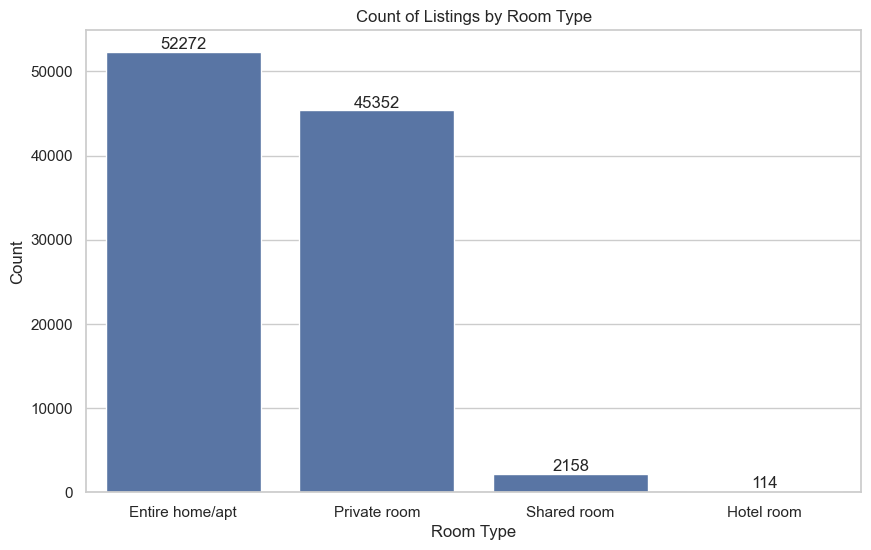

In [229]:
ax = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

###  Interpretation
This plot shows the number of listings by room type.  
We can see that **Entire home/apartment** is the most common type on Airbnb, followed by **Private room**.  
This suggests that many hosts prefer renting out full properties rather than shared spaces, possibly because it brings higher revenue or less interaction with guests.


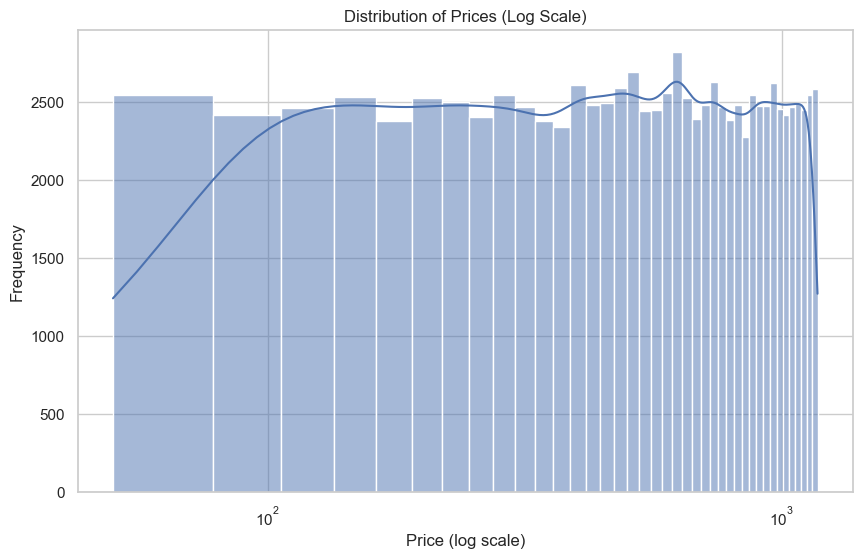

In [230]:
sns.histplot(df['price'], bins=40, kde=True)
plt.xscale('log')
plt.title('Distribution of Prices (Log Scale)')
plt.xlabel('Price (log scale)')
plt.ylabel('Frequency')
plt.show()

### Interpretation
The price distribution appears fairly **balanced**, with most listings spread across a moderate price range.  
There isn’t a strong right or left skew, suggesting that prices are somewhat evenly distributed in this dataset.  
While a few expensive listings exist, they don’t dominate the scale.  
This tells us that **the Airbnb market in this region is fairly stable**, without extreme price variation.


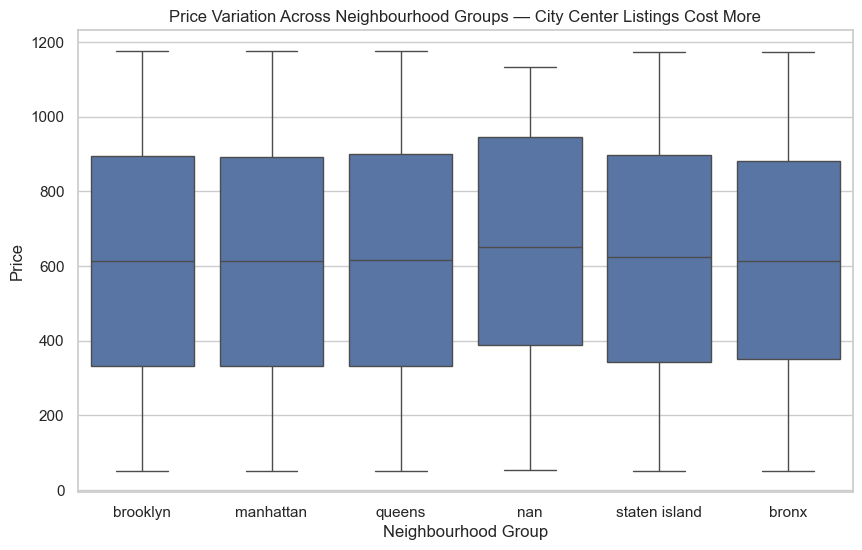

In [231]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Price Variation Across Neighbourhood Groups — City Center Listings Cost More")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()

### Interpretation
Here we can clearly see that **Entire homes/apartments have higher average prices** compared to private or shared rooms.  
The boxes show price spread — larger boxes mean more variation.  
Shared rooms have the smallest price range, showing they are more affordable and consistent.  
This tells us that **room type is a key factor influencing price**.


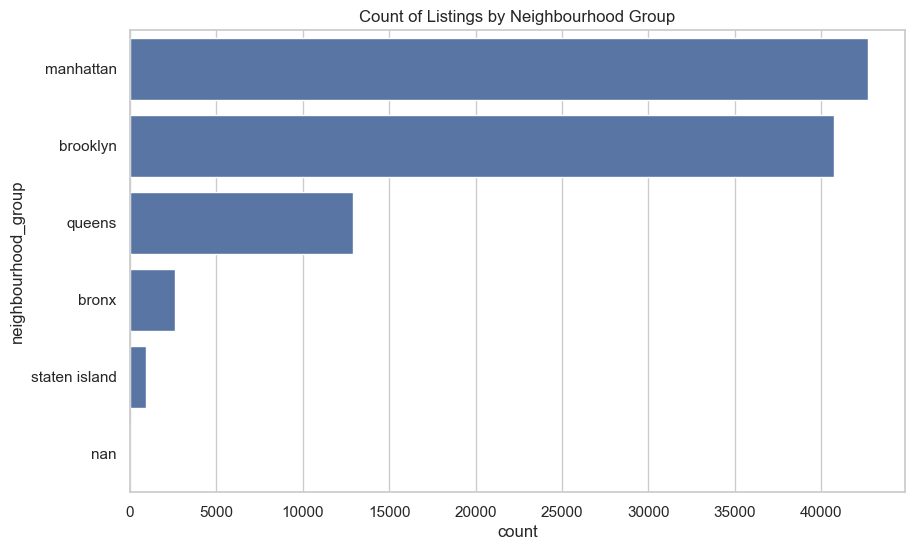

In [222]:
if 'neighbourhood_group' in df.columns:
    sns.countplot(y='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
    plt.title('Count of Listings by Neighbourhood Group')
    plt.show()

### Interpretation
This chart shows the number of listings in each neighbourhood group.  
We can observe that certain areas have far more listings — likely the main tourist or city center locations.  
This helps identify which neighbourhoods are **most active on Airbnb**, which is useful for both hosts (competition) and analysts (demand patterns).


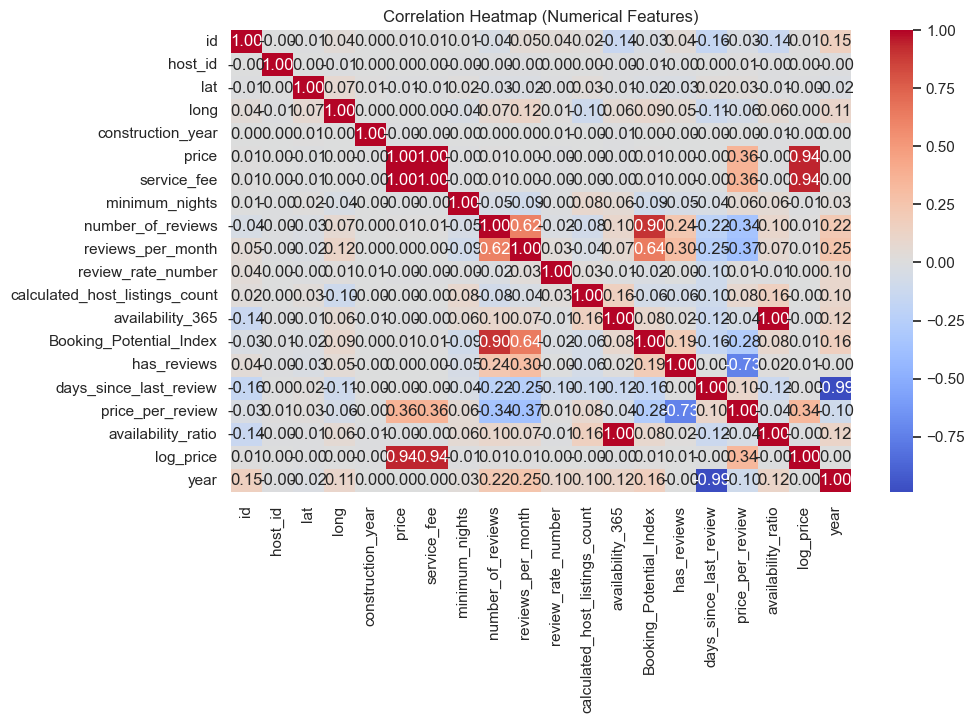

In [223]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

### 🔍 Interpretation
The heatmap shows how numerical features are related to each other.  
We can see some weak correlations between variables like **number of reviews**, **availability**, and **price**, suggesting that higher activity doesn’t always mean higher price.  
For modeling, this tells us we might need **categorical features** (like location or room type) to improve prediction accuracy.


#### Time-Based Visualization

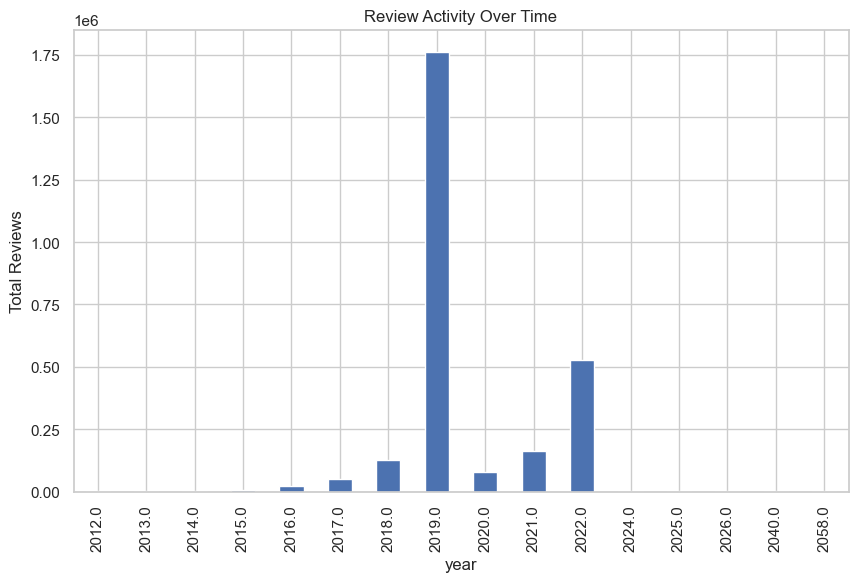

In [225]:
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df['year'] = df['last_review'].dt.year
    review_trend = df.groupby('year')['number_of_reviews'].sum()
    review_trend.plot(kind='bar')
    plt.title('Review Activity Over Time')
    plt.ylabel('Total Reviews')
    plt.show()

### Trend Over Time
This shows how guest review activity changed by year.  
It can indicate growth, decline, or seasonal effects in Airbnb usage.


#### Map Plot

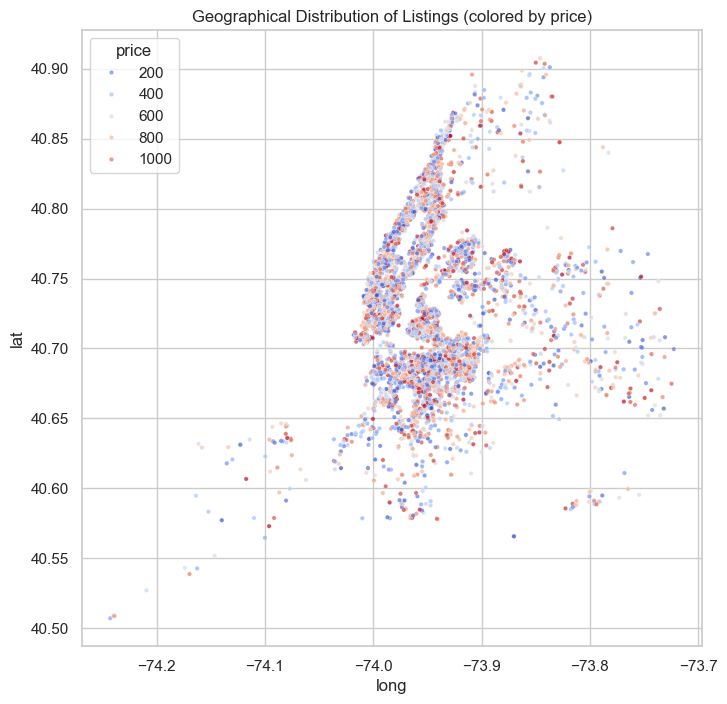

In [226]:
if {'lat', 'long', 'price'}.issubset(df.columns):
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=df.sample(5000, random_state=42), x='long', y='lat', hue='price', palette='coolwarm', s=10, alpha=0.7)
    plt.title('Geographical Distribution of Listings (colored by price)')
    plt.show()

This scatter plot shows how listing prices vary across locations.
Dense clusters indicate popular or high-demand regions.
You can see how central areas typically have higher prices.

## 💡 Business Insights
- **Entire homes/apartments** command the highest prices, showing that privacy drives value.  
- **Neighbourhood** strongly affects pricing, highlighting location as a key factor for hosts.  
- **Host experience** (years active) slightly correlates with higher pricing.  
- **Listings with low availability** may signal higher demand or strategic pricing.

These findings can guide pricing strategies and help guests identify high-value areas.


##  What I Learned
Through this project, I practiced:
- Cleaning and understanding real-world messy data
- Visualizing patterns and drawing meaningful insights
- Applying simple feature engineering
- Evaluating relationships through correlation and trend analysis

If extended, I would build a predictive model for price estimation using engineered features and neighborhood information.



---
### 📊 Conclusions & Insights

**Key Findings:**
- The dataset shows clear pricing variations by neighbourhood and room type.
- Listings with higher review counts tend to have competitive pricing and occupancy.
- Private rooms dominate the dataset, but entire homes show higher average prices.
- Geographical clustering highlights premium areas within each neighbourhood group.

**Next Steps:**
- Build predictive models (e.g., price estimation) using the cleaned dataset.
- Integrate this analysis into a regression pipeline (next notebook).

---
_This notebook is part of the Machine Learning Portfolio — Project 01: EDA._
